In [1]:
# 设置工作区
import os
# 设置工作目录为项目根目录
os.chdir('../')

#### 导入makemoon查看数据分布

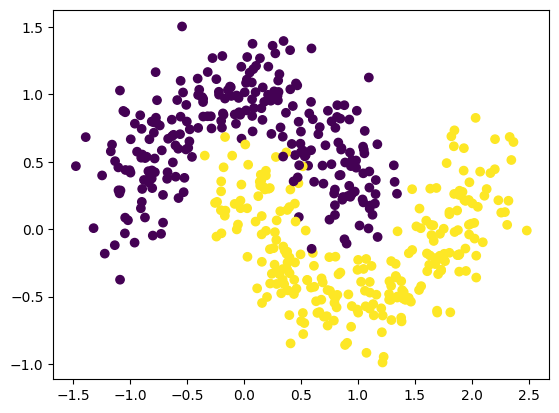

In [2]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from src.node import Node, Graph

# 生成 make_moons 数据集
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

nodes = []
index = 0
for df, label in zip(X, y):
    nodes.append(Node(df, label, index))
    index += 1
# scatter
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#### 生成图

In [3]:
# 获取图
graph = Graph(nodes)
adjacency_matrix = graph.get_adjacency_matrix()

#根据邻接矩阵获取所有的二元组，如：[(0, 1), (0, 2), (1, 2)]
edges = graph.get_edges()
print(edges)

[(0, 2), (0, 5), (0, 6), (0, 10), (0, 15), (0, 18), (0, 23), (0, 29), (0, 36), (0, 44), (0, 69), (0, 70), (0, 71), (0, 74), (0, 75), (0, 84), (0, 88), (0, 90), (0, 92), (0, 93), (0, 95), (0, 99), (0, 104), (0, 108), (0, 112), (0, 122), (0, 126), (0, 129), (0, 130), (0, 155), (0, 158), (0, 161), (0, 176), (0, 179), (0, 180), (0, 186), (0, 191), (0, 192), (0, 199), (0, 209), (0, 212), (0, 218), (0, 220), (0, 225), (0, 234), (0, 235), (0, 236), (0, 243), (0, 248), (0, 257), (0, 262), (0, 273), (0, 277), (0, 278), (0, 290), (0, 292), (0, 293), (0, 310), (0, 312), (0, 318), (0, 329), (0, 331), (0, 343), (0, 387), (0, 394), (0, 430), (0, 432), (0, 435), (0, 439), (0, 441), (0, 444), (0, 447), (0, 449), (0, 452), (0, 456), (0, 463), (0, 476), (0, 482), (0, 484), (0, 492), (1, 17), (1, 37), (1, 39), (1, 45), (1, 55), (1, 65), (1, 67), (1, 97), (1, 105), (1, 135), (1, 140), (1, 146), (1, 163), (1, 167), (1, 197), (1, 201), (1, 222), (1, 229), (1, 245), (1, 247), (1, 322), (1, 324), (1, 332), (1

#### 使用deepwalk跑邻接矩阵

In [ ]:
from src.deepwalk import deepwalk
nx = graph.to_nx()
# print(nx.nodes)
embeddings = deepwalk(nx)
embeddings

#### 取出embedding前两维，做可视化

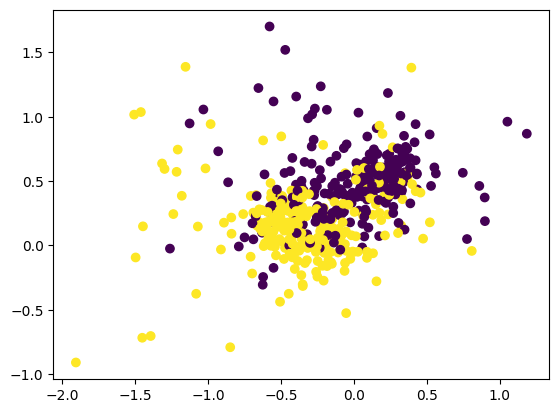

In [8]:
# 随便取两个维度看看
x = [embedding[0] for embedding in list(embeddings.values()) if embedding is not None]
y = [embedding[1] for embedding in list(embeddings.values()) if embedding is not None]



label = [node.label for node in nodes if(embeddings[str(node.index)] is not None)]

# 创建散点图
plt.scatter(x, y, c=label)

# 显示图形
plt.show()

#### PCA降维，降到2维

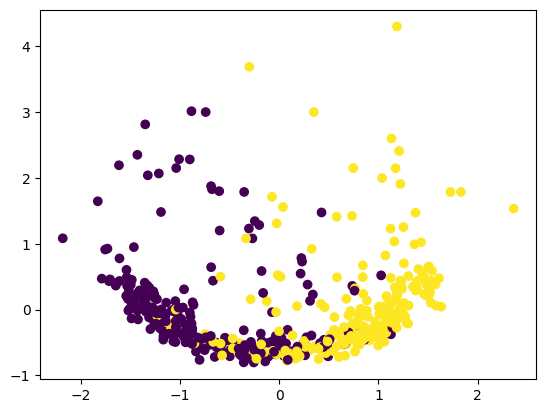

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 先drop掉None
embeddings = {key: value for key, value in embeddings.items() if value is not None}
# 假设embeddings是一个字典，其中包含嵌入值
embeddings_value = list(embeddings.values())

# 使用PCA进行降维
pca = PCA(n_components=2)
pca.fit(embeddings_value)
X_pca = pca.transform(embeddings_value)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=label)
plt.show()
